In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.016 seconds.
Prefix dict has been built successfully.


臺灣 291
進口 231
豬肉 173
美國 170
美豬 164
標示 146
學校 131
萊克多巴胺 127
農委會 105
食品 102


   Terms  Freq.
0     臺灣    291
1     進口    231
2     豬肉    173
3     美國    170
4     美豬    164
5     標示    146
6     學校    131
7  萊克多巴胺    127
8    農委會    105
9     食品    102
Text(0, 0.5, 'Frequency')


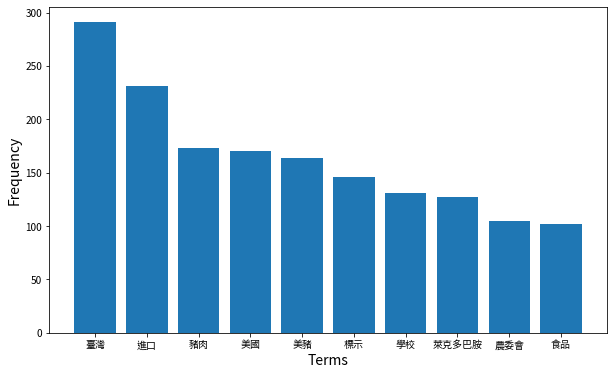

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimportsspeech_tsai.xlsx")
data01.fillna("",inplace=True)
lmspeech_pro = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiproim = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_tsaiproim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_proim_plotly = pd.DataFrame(common_words_tsaiproim, columns = ['ReviewText' , 'count'])
tsai_proim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Tsai era')

tsaiproim_cwdf = pd.DataFrame(common_words_tsaiproim, columns=['Terms', 'Freq.'])  
print(tsaiproim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

proim_tsai_fig = plt.figure(figsize=(10,6))
proim_tsai_fig = plt.bar(tsaiproim_cwdf['Terms'], tsaiproim_cwdf['Freq.']) 
proim_tsai_fig = plt.xlabel('Terms', fontsize = 14)
proim_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-imports legislators in Tsai era", fontsize = 18)

print(proim_tsai_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


進口 889
美國 717
臺灣 621
豬肉 565
萊克多巴胺 559
萊豬 513
開放 496
美豬 481
瘦肉精 468
標示 394


   Terms  Freq.
0     進口    889
1     美國    717
2     臺灣    621
3     豬肉    565
4  萊克多巴胺    559
5     萊豬    513
6     開放    496
7     美豬    481
8    瘦肉精    468
9     標示    394
Text(0, 0.5, 'Frequency')


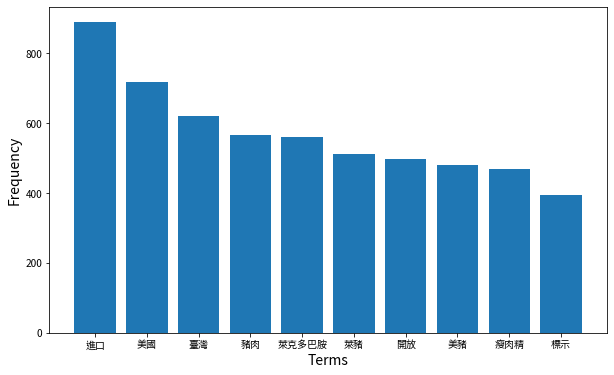

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimportsspeech_tsai.xlsx")
data02.fillna("",inplace=True)
lmspeech_anti = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiantiim = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_tsaiantiim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_antiim_plotly = pd.DataFrame(common_words_tsaiantiim, columns = ['ReviewText' , 'count'])
tsai_antiim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Tsai era')

tsaiantiim_cwdf = pd.DataFrame(common_words_tsaiantiim, columns=['Terms', 'Freq.'])  
print(tsaiantiim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antiim_tsai_fig = plt.figure(figsize=(10,6))
antiim_tsai_fig = plt.bar(tsaiantiim_cwdf['Terms'], tsaiantiim_cwdf['Freq.'])
antiim_tsai_fig = plt.xlabel('Terms', fontsize = 14)
antiim_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Tsai era", fontsize = 18)

print(antiim_tsai_fig)

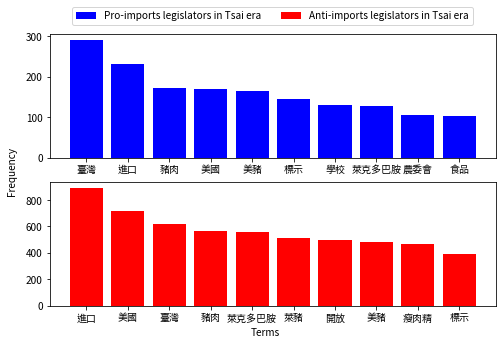

In [4]:
#Merging two figures into one
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
proim_tsai_fig = plt.bar(tsaiproim_cwdf['Terms'], tsaiproim_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
antiim_tsai_fig = plt.bar(tsaiantiim_cwdf['Terms'], tsaiantiim_cwdf['Freq.'], color = 'red')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[proim_tsai_fig, antiim_tsai_fig], labels=['Pro-imports legislators in Tsai era', 'Anti-imports legislators in Tsai era'], 
           bbox_to_anchor=[0.868, 0.97], ncol=2)
plt.savefig('imwordfreq_tsai.png', dpi=300)

In [5]:
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)